In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df1 = df.dropna()
df1.reset_index(drop=True)
df1.shape

(18285, 5)

In [10]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [11]:
x.shape

(18285, 4)

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    review = re.sub('[^A-Za-z]',' ',x.iloc[i,1]) # title
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


    

In [17]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Bag of Words
cv = CountVectorizer(ngram_range=(1,3), max_features=5000)
X = cv.fit_transform(corpus).toarray()


In [19]:
cv.get_feature_names_out()[:10]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

mnb = MultinomialNB()
mnb.fit(X_train,y_train)


MultinomialNB()

              precision    recall  f1-score   support

    Reliable       0.92      0.89      0.90      2600
  Unreliable       0.86      0.90      0.88      1972

    accuracy                           0.89      4572
   macro avg       0.89      0.89      0.89      4572
weighted avg       0.89      0.89      0.89      4572



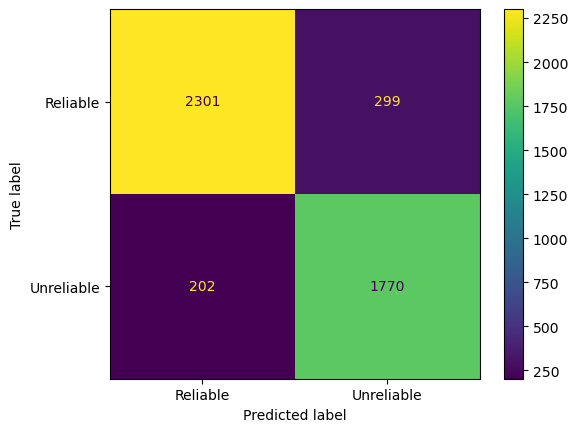

In [29]:
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()

